In [1]:
!pip -q install jcopml

In [12]:
import pandas as pd
import numpy as np

from jcopml.automl import AutoRegressor

# Import Data

In [13]:
df = pd.read_csv('/kaggle/input/admissionpredict/Admission_Predict.csv', index_col='Serial No.')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# Training

In [14]:
X = df.drop(columns='Chance of Admit ')
y = df['Chance of Admit ']

In [15]:
model = AutoRegressor(num_feature=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA'], cat_feature=['University Rating', 'Research'])
model.fit(X, y, cv=5,)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.730e-01, tolerance: 1.404e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.952e-01, tolerance: 1.391e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.669e-01, tolerance: 1.391e

================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.0002800940363375679
algo__fit_intercept       | True
algo__l1_ratio            | 0.42340148070636974

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.7984198710953783
Valid: 0.7744653369843731
Test : 0.8232231700002818


# View Results

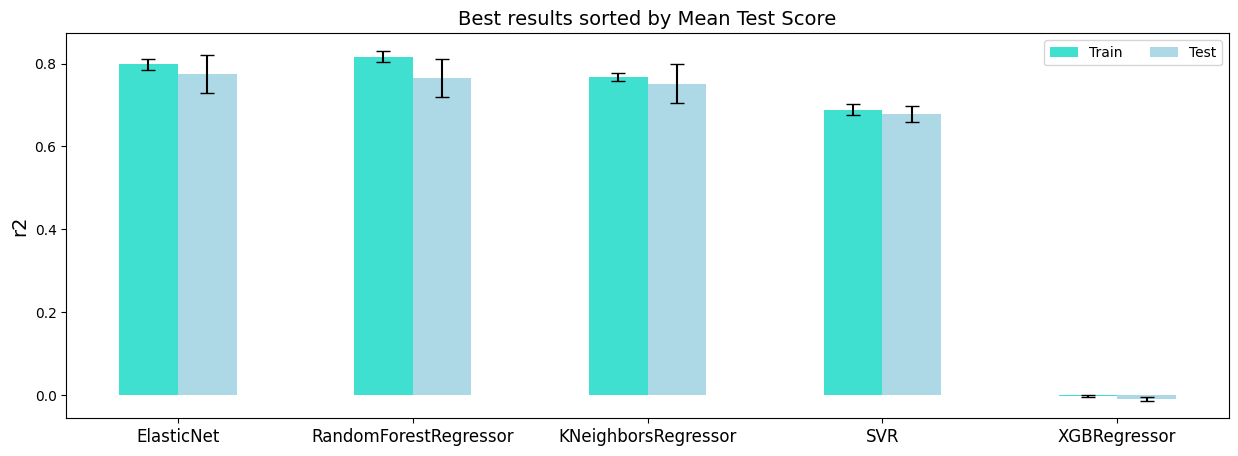

In [16]:
model.plot_results()

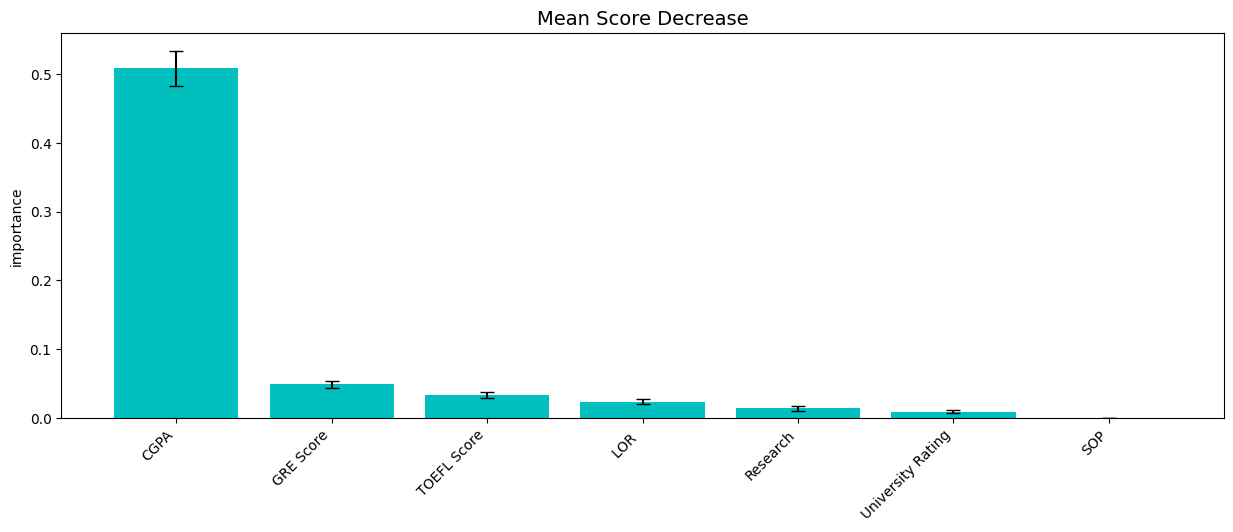

In [17]:
model.mean_score_decrease()

# Only ElasticNet

In [19]:
model.fit(X, y, cv=5, algo=['enet'], n_trial=100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+00, tolerance: 1.412e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+00, tolerance: 1.391e-02
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+00, tolerance: 1.404e

================== Best Model Info ==================
algo                      | ElasticNet
algo__alpha               | 0.010609405001897948
algo__fit_intercept       | True
algo__l1_ratio            | 0.1682910421729306

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=True, strategy='median')
numerical_scaler          | RobustScaler

=========== Score ===========
Train: 0.7952242217552052
Valid: 0.781507472763988
Test : 0.8175462806113224
